In [15]:
from cmdstanpy import CmdStanModel
import arviz as az
import numpy as np
import scipy.stats as stats
import seaborn as sns

import matplotlib.pyplot as plt
import pandas as pd

In [16]:
data = pd.read_csv("Airline_data.csv")

raw_data = data.drop(["Year"], axis=1)
raw_data = data.rename(columns={"Miles flown [100 mln miles]": "mlf"})
raw_data.head()

,Year,Fatal accidents,Passenger deaths,mlf
0,1976,24,734,3863.0
1,1977,25,516,4300.0
2,1978,31,754,5027.0
3,1979,31,877,5481.0
4,1980,22,814,5814.0


In [23]:
raw_data.describe()

,Year,Fatal accidents,Passenger deaths,mlf
count,10.00000,10.000000,10.000000,10.000000
mean,1980.50000,23.800000,691.900000,5715.800000
std,3.02765,4.709329,252.389228,1117.767795
min,1976.00000,16.000000,223.000000,3863.000000
25%,1978.25000,21.250000,570.500000,5140.500000
50%,1980.50000,23.000000,759.000000,5845.500000
75%,1982.75000,25.750000,812.750000,6175.500000
max,1985.00000,31.000000,1066.000000,7433.000000


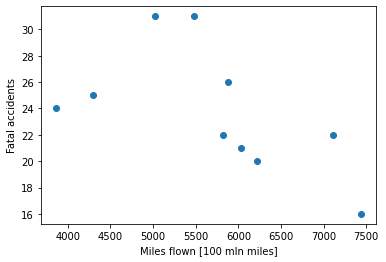

In [24]:
# data visualisation
plt.scatter(raw_data["mlf"], raw_data["Fatal accidents"])
plt.xlabel("Miles flown [100 mln miles]")
plt.ylabel("Fatal accidents")
plt.show()


In [18]:
print(raw_data["mlf"].values)

[3863. 4300. 5027. 5481. 5814. 6033. 5877. 6223. 7433. 7107.]


In [19]:
model_prior=CmdStanModel(stan_file='model_prior.stan')

data_prior = dict(
    N = len(raw_data),
    mlf = raw_data["mlf"].values,
    alpha = -1,
    theta = 5e-4,
)

R = 1000
sim=model_prior.sample(
                    data=data_prior,
                    iter_sampling=R,
                    iter_warmup=0,
                    chains=1,
                    fixed_param=True,
                    seed=20001101,
                    refresh=R
                    )

INFO:cmdstanpy:compiling stan file /home/Lab5/model_prior.stan to exe file /home/Lab5/model_prior
INFO:cmdstanpy:compiled model executable: /home/Lab5/model_prior

--- Translating Stan model to C++ code ---
bin/stanc  --o=/home/Lab5/model_prior.hpp /home/Lab5/model_prior.stan
Warning in '/home/Lab5/model_prior.stan', line 10, column 4: Declaration of
    arrays by placing brackets after a variable name is deprecated and will
    be removed in Stan 2.32.0. Instead use the array keyword before the type.
    This can be changed automatically using the auto-format flag to stanc

--- Compiling, linking C++ code ---
g++ -std=c++1y -pthread -D_REENTRANT -Wno-sign-compare -Wno-ignored-attributes      -I stan/lib/stan_math/lib/tbb_2020.3/include    -O3 -I src -I stan/src -I lib/rapidjson_1.1.0/ -I lib/CLI11-1.9.1/ -I stan/lib/stan_math/ -I stan/lib/stan_math/lib/eigen_3.3.9 -I stan/lib/stan_math/lib/boost_1.75.0 -I stan/lib/stan_math/lib/sundials_6.0.0/include -I stan/lib/stan_math/lib/sundials


INFO:cmdstanpy:CmdStan done processing.


In [20]:
sim.draws_pd().head()

,lp__,accept_stat__,alpha,theta,lambda[1],lambda[2],lambda[3],lambda[4],lambda[5],lambda[6],...,y[1],y[2],y[3],y[4],y[5],y[6],y[7],y[8],y[9],y[10]
0,0.0,0.0,-0.952408,-0.000010,0.371488,0.369902,0.367278,0.365648,0.364458,0.363677,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,-1.264940,-0.000011,0.270788,0.269521,0.267425,0.266125,0.265175,0.264552,...,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0
2,0.0,0.0,-0.947569,-0.000010,0.372716,0.371060,0.368321,0.366621,0.365379,0.364564,...,1.0,0.0,1.0,4.0,0.0,1.0,1.0,0.0,1.0,0.0
3,0.0,0.0,-1.617880,-0.000008,0.192074,0.191381,0.190232,0.189518,0.188996,0.188654,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,-0.983755,-0.000010,0.359832,0.358274,0.355696,0.354096,0.352927,0.352161,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0


In [21]:
sim.draws_pd().loc[:,"y[1]":"y[10]"].values

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 1., 1.],
       [1., 0., 1., ..., 0., 1., 0.],
       ...,
       [0., 0., 1., ..., 0., 1., 2.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

TypeError: cannot do positional indexing on Index with these indexers [y[1]] of type str

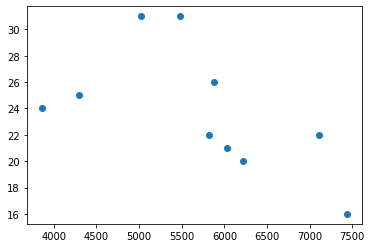

In [22]:
plt.scatter(raw_data["mlf"].values, raw_data["Fatal accidents"].values)
plt.scatter(raw_data["mlf"].values, sim.draws_pd().iloc[:,"y[1]":"y[10]"])
